In [28]:
import data_prepare.misc as misc
import cv2
import numpy as np
import math
from concurrent.futures import ProcessPoolExecutor, as_completed, ThreadPoolExecutor

# name = "e_chi14N_1.png"
# img_gt = cv2.imread(f"E:/Dataset/amakano2/720p/{name}").astype(np.float32) / 255
# img = cv2.imread(f"E:/Dataset/amakano2/1080p/{name}")
# name = "hinata4794.png"
# img_gt = cv2.imread(f"R:/otome/_1_/{name}").astype(np.float32) / 255
# img = cv2.imread(f"R:/otome/_0_/{name}")

img_gt = cv2.imread("R:/ginka/lr/o5bexpd1.png").astype(np.float32) / 255
img = cv2.imread("R:/ginka/hr/8ovwuke5.png")
img = misc.resize(img, tuple(img_gt.shape[:2][::-1]), interpolation = misc.Filter.LANCZOS).astype(np.float32) / 255

def f(amount, threshold, radius = 3):
        out = misc.unsharp_mask_node(img, radius, amount, threshold)
        return math.log(1 - misc.calculate_ssim(out, img_gt))

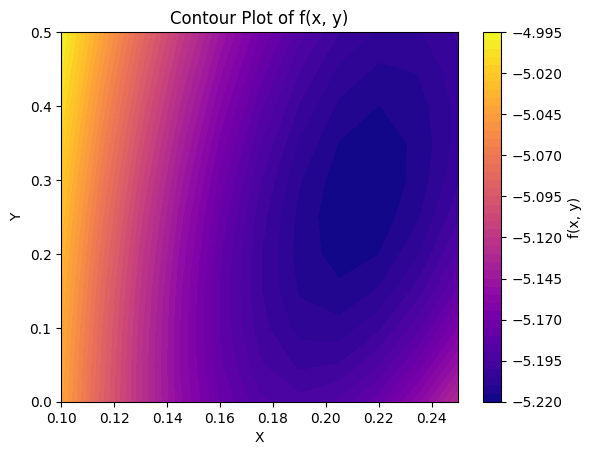

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor


# Generate x and y values
tick = 11
x_vals = np.linspace(0.0, 0.5, tick)
y_vals = np.linspace(0, 4, tick)
x_vals = np.linspace(0.1, 0.25, tick)
y_vals = np.linspace(0, 0.5, tick)

# Create an empty grid to store function values
z = np.zeros((len(x_vals), len(y_vals)))

# Define a function to evaluate f(x, y) in parallel
def evaluate_point(i, j):
    return i, j, f(x_vals[i], y_vals[j], 3)

# Evaluate the function at each point on the grid in parallel
with ThreadPoolExecutor() as executor:
    futures = []
    for i in range(len(x_vals)):
        for j in range(len(y_vals)):
            futures.append(executor.submit(evaluate_point, i, j))
    
    for future in futures:
        result = future.result()
        z[result[1], result[0]] = result[2]

# Create a 2D contour plot
X, Y = np.meshgrid(x_vals, y_vals)
plt.contourf(X, Y, z, 50, cmap='plasma')
plt.colorbar(label='f(x, y)')

# Set labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Contour Plot of f(x, y)')

# Show plot
plt.show()


In [40]:
#cv2 lanczos > -5
import os
name = "e_chi14N_1.png"
for root, dir, files in os.walk("R:/ginka/lr_unique"):
    for name in files:
        hr = cv2.imread(f"R:/ginka/hr_unique/{name}")
        print(name)
        img_gt = cv2.imread(f"R:/ginka/lr_unique/{name}").astype(np.float32) / 255
        img = misc.resize(hr, tuple([int(i/2) for i in hr.shape[:2][::-1]]), interpolation = misc.Filter.LANCZOS).astype(np.float32) / 255
        # print(f(0.0929, 0.91))
        print(f(0.154, 0.5))
        # img = misc.resize(hr, (1280, 720), interpolation = misc.Filter.LANCZOS).astype(np.float32) / 255
        # print(f(0.0, 0.0))
        # img = misc.resize(hr, (1280, 720), interpolation = misc.Filter.CATROM).astype(np.float32) / 255
        # print(f(0.15, 0.9))
# img = misc.resize(hr, (1280, 720), interpolation = misc.Filter.GAUSS).astype(np.float32) / 255
# print(f(0.25, 1.1))

00001838ff7e7c3c.png
-5.037696029398062
0002038e9e3fbfff.png
-5.221576736770975
00081c3c3c3e3838.png
-5.207032500470846
000867273f3f3f3f.png
-4.8818827646818574
000d0f0f0f0f0fde.png
-5.231629637552993
0025373f1f1f1f9f.png
-5.4721359762463875
0030f0f0f0f0f8f4.png
-5.355131787526049
0040606163ffffff.png
-5.406310199951369
0040646465f7ffff.png
-5.250633440458537
0041efefc5a7f7ee.png
-5.0766874877240475
0101333377776fce.png
-5.481613099174271
01030b0f0f0f1f7f.png
-5.3469886861180855
01030f0f0f0f3fff.png
-5.580460607468344
0800232f2f3fffbf.png
-5.117748688558102
080c0f0f0f1f3f3f.png
-4.84637004370142
0f0f1f1f973f7b0f.png
-5.223289453834491
10f8fc7e3e3cdcf8.png
-5.202722078770248
10fcfc7e3e34cce0.png
-5.251417990547956
1c1c1c02c27b6f4f.png
-4.866771563656027
1d1d3f3e373f1f0d.png
-5.161326906980209
1f37777360f0f0e0.png
-5.460333892005602
30307070f1f9ffe0.png
-5.438853038044993
3f3f1b333f0b0900.png
-5.200363025625568
3f3f9f1f170b0100.png
-5.349532563078129
40607078783f3f1f.png
-4.8516183614583

In [34]:
img_gt = cv2.imread("R:/ginka/lr/qdt353mw.png").astype(np.float32) / 255
img = cv2.imread("R:/ginka/hr/c6btfh8t.png")
# img_gt = cv2.imread("R:/ginka/lr/o5bexpd1.png").astype(np.float32) / 255
# img = cv2.imread("R:/ginka/hr/8ovwuke5.png")
img = misc.resize(img, tuple(img_gt.shape[:2][::-1]), interpolation = misc.Filter.LANCZOS).astype(np.float32) / 255
print(f(0.154, 0.5))
print(f(0.21, 0.3))
print(f(0, 0))

# img = misc.unsharp_mask_node(img, 0.154, 0.5, 3) * 255
# cv2.imwrite("R:/ia5rpyzl.png", img)

-5.202722078770248
-5.095312764643913
-4.623099050122935


In [38]:
img1 = cv2.imread(f"R:/ginka/lr/i6kwhydv.png").astype(np.float32) / 255
img2 = cv2.imread(f"R:/ginka/lr/jl1cm8f2.png").astype(np.float32) / 255
math.log(1 - misc.calculate_ssim(img1, img2))


-4.4444819593342215

In [191]:
img = cv2.imread(f"R:/amakano/Output/0/StYuuh01a_0000i.png")
img = misc.resize(img, tuple([int(i*9/16) for i in img.shape[:2][::-1]]), interpolation = misc.Filter.LANCZOS).astype(np.float32) / 255
img = misc.unsharp_mask_node(img, 0.0929, 0.91, 3) * 255
img = misc.resize(img, tuple([int(i*11/16) for i in img.shape[:2][::-1]]), interpolation = misc.Filter.LANCZOS).astype(np.float32) / 255
img = misc.unsharp_mask_node(img, 0.0929, 0.91, 3) * 255
cv2.imwrite("R:/StYuuh01a_0000i.png", img)

True

In [1]:
import cv2
import data_prepare.misc as misc
name = "e_chi14N_1.png"
img = cv2.imread(f"E:/Dataset/amakano2/720p/{name}")
img = misc.ringing(img, (640, 360))
cv2.imwrite("R:/test.png", img)

True